# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

# INTRODUCTION 

### BACKGROUND

Toronto demographics show that it is a large and ethnically diverse metropolis. It is the largest city in the Canada with a long history of international immigration.
Toronto was home to nearly ***2.93 million*** people in 2018. Over the last decade, the city has been growing faster than the region. The Toronto region continues to be by far the leading metropolitan gateway for legal immigrants admitted into the Canada. 

This final project explores the best locations for restaurants throughout the city of Toronto. Potentially the owner of the new restaurant can have great success and consistent profit. However, as with any business, opening a new restaurant requires serious considerations and is more complicated than it seems from the first glance. In particular, the location of the restaurant is one of the most important factors that will affect whether it will have success or a failure. So our project will attempt to answer the questions ***“Where should the investor open a Restaurant?”, “Where should I go If I want good restaurant?” and “Which type of restaurant is most famous?”***

### BUSINESS PROBLEM 

The objective of this Capstone project is to analyse and select the best locations in the city of Toronto to open a new restaurant. Using Data Science methodology and instruments such as Data Analysis and Visualization, this project aims to provide solutions to answer the business question: ***Where in the city of Toronto, where should the investor open a new Restaurant?***

# DATA ACQUISITION AND CLEANING 

# Data Acquisition

The data acquired for this project is a combination of data from two sources. 
The first source of data is scraped from a Wikipedia page that contains the list of Toronto boroughs. This page contains additional information about the boroughs, the following are the columns:
* **Postal Code:** Postal code of Neighbourhoods
* **Borough:** Name of Borough
* **Neighbourhood:** Name of Neighbourhoods
The second data source of the project uses a Toronto latitude and longitude according to the Postal Code. The dataset contains the following columns: 
* **Postal Code:** Postal code of Neighbourhoods
* **Latitude:** Latitude of Neighbourhoods
* **Longitude:** Longitude of Neighbourhood


## INSTALLING REQUIRED LIBRARY
* BeautifulSoup
* Requests
* Pandas
* Geocoder 
* Json
* Matplotlib
* Sklearn
* Folium

In [12]:
print("Starting to import library")
#!pip3 install beautifulsoup4
from bs4 import BeautifulSoup

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('All Libraries are imported.')

Starting to import library
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    conda-4.8.4                |   py37hc8dfbb8_2         3.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.9 MB

The following NE

### Getting data from wikipedia using BeautifulSoup

### Url of Wikipedia Page

In [13]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

### Using BeautifulSoup to extract data from wikipdeia

In [14]:
source = requests.get(url).text
soup = BeautifulSoup(source, 'html.parser')
print(soup.prettify()) # Whole page code of wikipedia page in html format

In [15]:
table = soup.find("table")  ## Our required data is present in table

### Creating Pandas DataFrame to store
* Postal Code
* Borough
* Neighborhood

In [16]:
columns_name = ['PostalCode','Borough','Neighborhood']
df = pd.DataFrame(columns = columns_name)
df

,PostalCode,Borough,Neighborhood


### Appending data from html code into dataframe using for loop

In [17]:
for tr in table.find_all('tr'):
    data = []
    for td in tr.find_all('td'):
        data.append(td.text.strip())
    if len(data)==3:
        df.loc[len(df)] = data

In [18]:
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### Removing Borough which is Not assigned

In [19]:
df.drop(df[df['Borough'] == 'Not assigned'].index, inplace = True)
df.head(10)

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [20]:
df.reset_index(inplace = True, drop = True)

### First five row of Borough

In [21]:
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


### Merging Neighborhood with same postal code

In [22]:
df.groupby('PostalCode').agg(lambda x: x.tolist())
print("Shape of dataframe:",df.shape)
df.head(10)

Shape of dataframe: (103, 3)


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


### URL of Latitude and Longitude along with Postal Code of Canada

In [23]:
url = 'http://cocl.us/Geospatial_data'
geo_df=pd.read_csv(url)
geo_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [24]:
geo_df.rename(columns={'Postal Code':'PostalCode'}, inplace = True)
final_df = pd.merge(df, geo_df,how = 'right', on ='PostalCode')
final_df.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


### Grouping Borough to see total Borough

In [25]:
final_df.groupby('Borough').count()

,PostalCode,Neighborhood,Latitude,Longitude
Borough,,,,
Central Toronto,9,9,9,9
Downtown Toronto,19,19,19,19
East Toronto,5,5,5,5
East York,5,5,5,5
Etobicoke,12,12,12,12
Mississauga,1,1,1,1
North York,24,24,24,24
Scarborough,17,17,17,17
West Toronto,6,6,6,6


## Creating new dataframe for only Toronto and it Neighbourhoods

In [26]:
toronto_data = final_df[final_df['Borough'].str.contains("Toronto")].reset_index(drop = True)
toronto_data.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


> ### Getting geograpical coordinate of Toronto 

In [27]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


## Create map of totronto using latitude and longitude values

In [28]:
# create map of totronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Define Foursquare Credentials and Version

In [29]:
CLIENT_ID = 'LLUFECZGYPS5WAGC0HZSDEBP1NNW2O1B1DTXODW3VLHIY5L3' # your Foursquare ID
CLIENT_SECRET = 'LFYVSAEBXZN2DSYKQM2EXXDPDUW01B4SVQ5RGSDPWA5JDXJJ' # your Foursquare Secret
VERSION = '20161225' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LLUFECZGYPS5WAGC0HZSDEBP1NNW2O1B1DTXODW3VLHIY5L3
CLIENT_SECRET:LFYVSAEBXZN2DSYKQM2EXXDPDUW01B4SVQ5RGSDPWA5JDXJJ


#### Let's explore the first neighborhood in our dataframe.

In [30]:
neighborhood_latitude = toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


#### Now, let's get the top 100 venues that are in Regent Park within a radius of 500 meters.

In [31]:
latitude = str(latitude)
longitude = str(longitude)

In [32]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
location_list = [] # initiate a list to store data from Foursquare API requests
search_query = 'Regent Park'

#for neighbourhood, latitude, longitude in zip(toronto.Neighbourhood, toronto.Latitude, toronto.Longitude):
# create URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET, 
    latitude, 
    longitude,
    VERSION,
    search_query,
    radius, 
    LIMIT)
url

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f3416a3fab6706cc6a45902'},
 'response': {'venues': [{'id': '535019a4498ea2ba59289985',
    'name': 'Standard Parking',
    'contact': {},
    'location': {'address': '181 Bay Street, P1 Level',
     'crossStreet': 'Enter on 10 Front St W or 7 Wellington St W.',
     'lat': 43.653226,
     'lng': -79.383184,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.653226,
       'lng': -79.383184}],
     'distance': 66,
     'postalCode': 'M5J 2T3',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['181 Bay Street, P1 Level (Enter on 10 Front St W or 7 Wellington St W.)',
      'Toronto ON M5J 2T3',
      'Canada']},
    'categories': [{'id': '4c38df4de52ce0d596b336e1',
      'name': 'Parking',
      'pluralName': 'Parking',
      'shortName': 'Parking',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/parking_',
       'suffix': '.png'},
      'primary': Tr

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

## 2. Explore Neighborhoods in Toronto

#### Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *toronto_venues*.

In [34]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport


#### Let's check the size of the resulting dataframe

In [35]:
print(toronto_venues.shape)

(1640, 7)


In [36]:
toronto_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
5,"Regent Park, Harbourfront",43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park
6,"Regent Park, Harbourfront",43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site
7,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
8,"Regent Park, Harbourfront",43.65426,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center
9,"Regent Park, Harbourfront",43.65426,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub


#### Let's find out how many unique categories can be curated from all the returned venues

In [37]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 238 uniques categories.


## Neignborhood with maximum number of venues category

In [38]:
toronto_venues_max = toronto_venues.groupby('Neighborhood').count()
sorted__toronto_venue = toronto_venues_max.sort_values(by=['Venue'], axis=0, ascending=False, inplace=False)
sorted__toronto_venue.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Garden District, Ryerson",100,100,100,100,100,100
"Toronto Dominion Centre, Design Exchange",100,100,100,100,100,100
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"Richmond, Adelaide, King",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


## Venue Category with maximum number

In [39]:
toronto_venues_grouped = toronto_venues.groupby('Venue Category').count()
sorted__toronto_venue_grouped = toronto_venues_grouped.sort_values(by=['Venue'], axis=0, ascending=False, inplace=False)
sorted__toronto_venue_grouped.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Coffee Shop,159,159,159,159,159,159
Café,89,89,89,89,89,89
Restaurant,55,55,55,55,55,55
Hotel,37,37,37,37,37,37
Italian Restaurant,37,37,37,37,37,37
Park,35,35,35,35,35,35
Japanese Restaurant,32,32,32,32,32,32
Bakery,30,30,30,30,30,30
Pizza Place,29,29,29,29,29,29


# Creating table with top Neignborhood and top Resturant

In [40]:
top_place_resturant = toronto_venues.loc[toronto_venues['Neighborhood'].isin(['Garden District, Ryerson',
                                                              'Toronto Dominion Centre, Design Exchange',
                                                              'Commerce Court, Victoria Hotel',
                                                              'Richmond, Adelaide, King',
                                                              'Harbourfront East, Union Station, Toronto Islands',
                                                              'First Canadian Place, Underground city'])]

top6_place_resturant = top_place_resturant[top_place_resturant['Venue Category'].str.contains("Restaurant")] 
top6_place_resturant = top6_place_resturant[['Neighborhood','Venue Category']]
top6_place_resturant.reset_index(drop = True, inplace = True)
top6_place_resturant.head()

,Neighborhood,Venue Category
0,"Garden District, Ryerson",Thai Restaurant
1,"Garden District, Ryerson",Ramen Restaurant
2,"Garden District, Ryerson",Sushi Restaurant
3,"Garden District, Ryerson",Japanese Restaurant
4,"Garden District, Ryerson",Fast Food Restaurant


### Table to indicate which number of Resturant contain by each Neighbourhood

In [41]:
top_place = pd.pivot_table(top6_place_resturant, 
                       index='Neighborhood',
                       columns = 'Venue Category', 
                       aggfunc=len,
                       margins = True, 
                       fill_value=0).reset_index().rename_axis(None, axis=1)
top_place.set_index("Neighborhood", inplace = True)
top_place = top_place.T
top_place.sort_values(by=('All'), ascending=False,inplace=True)
top_place.drop(top_place.iloc[:,6:], axis = 1, inplace = True)
top_place = top_place.T
top_place.drop(top_place.iloc[:,0:1], axis = 1, inplace = True)
top_place.drop(top_place.iloc[:,7:], axis = 1, inplace = True)
top_place['Total'] = top_place.sum(axis=1)
top_place.sort_values(by=('Total'), ascending=False,inplace=True)
top_place

,Restaurant,Japanese Restaurant,Seafood Restaurant,American Restaurant,Italian Restaurant,Sushi Restaurant,Asian Restaurant,Total
Neighborhood,,,,,,,,
"Commerce Court, Victoria Hotel",7,2,3,4,2,0,2,20
"First Canadian Place, Underground city",4,4,3,3,1,2,3,20
"Toronto Dominion Centre, Design Exchange",4,3,3,3,2,2,2,19
"Richmond, Adelaide, King",4,1,1,2,0,2,1,11
"Harbourfront East, Union Station, Toronto Islands",3,1,1,0,3,1,0,9
"Garden District, Ryerson",1,3,1,0,2,1,0,8


# METHODOLOGY 

## EXPLORATORY DATA ANALYSIS

### Graphical analysis of Top 6 Neighbourhoods 

Matplotlib function is used to plot top 6 neighbourhood which have maximum number of restaurant. 

Type of restaurant along with it number in each neighbourhood is also plotted in bar graph. It will give clear idea about people interest in that neighbourhood 

## Ploting Top Neignbourhood with max Resturant

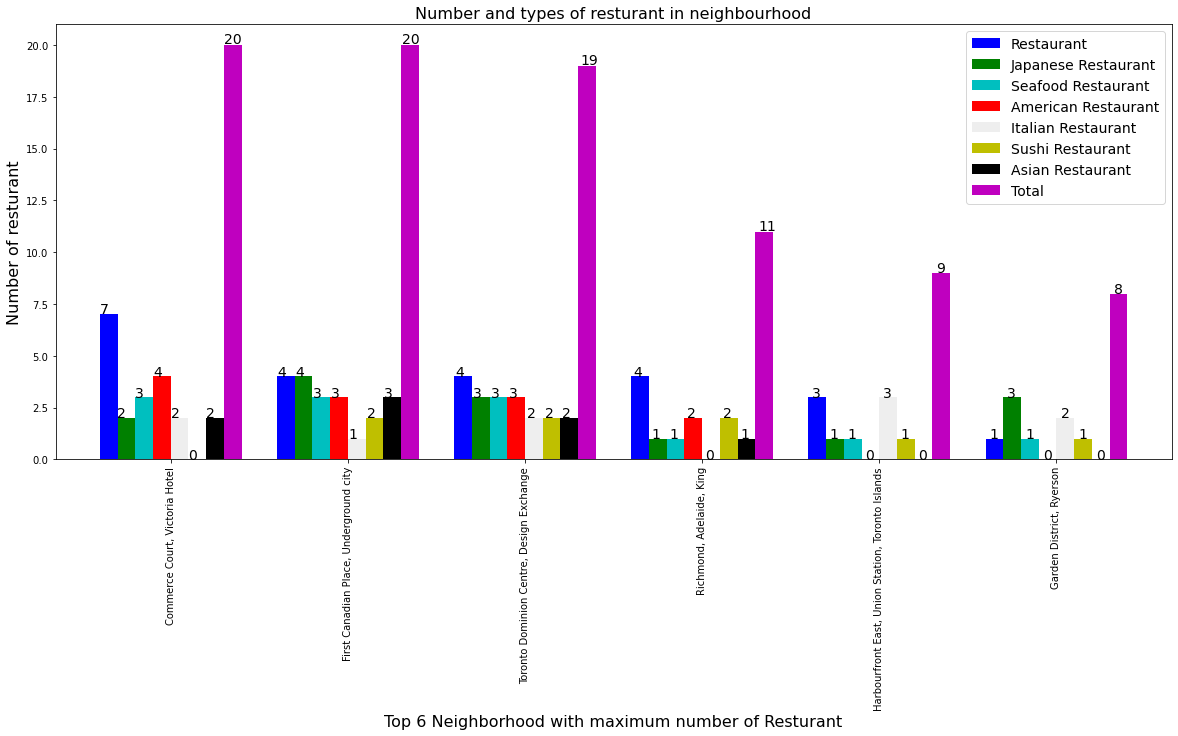

In [42]:
import matplotlib.pyplot as plt
colors = ['b','g','c','r','#eeeeee','y','k','m']
Plot = top_place.plot(kind='bar',
               figsize = (20,8),
               width = 0.8,
               color = colors)

# Adding notations into Bar Graph
plt.legend(fontsize = 14)
plt.ylabel("Number of resturant",fontsize = 16)
plt.xlabel("Top 6 Neighborhood with maximum number of Resturant", fontsize = 16)
plt.title("Number and types of resturant in neighbourhood", fontsize = 16)

# Showing percentage value on every bar graph
for p in Plot.patches:
    Plot.annotate(str(p.get_height()),(p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 14)
plt.savefig('1.png', bbox_inches='tight')
plt.show()

# Factor which affect location of Resturant

### Nighbourhood with highest number of Resturant

By plotting the dataframe we can visualize which type of restaurant has the highest number. It is clearly visible that Italian and Japanese restaurant are more famous in Toronto followed by Seafood and American.

In [43]:
toronto_restaurant = toronto_venues[toronto_venues['Venue Category'].str.contains("Restaurant")] 
toronto_restaurant_N = toronto_restaurant.groupby('Neighborhood').count()
sorted__toronto_restaurant_N = toronto_restaurant_N.sort_values(by=['Venue'], axis=0, ascending=False, inplace=False)
print("Number of Neignbourhood with resturant :", toronto_restaurant_N.shape)
sorted__toronto_restaurant_N_10 = sorted__toronto_restaurant_N.iloc[0:20,:]
sorted__toronto_restaurant_N.head()

Number of Neignbourhood with resturant : (34, 6)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"First Canadian Place, Underground city",28,28,28,28,28,28
"Commerce Court, Victoria Hotel",27,27,27,27,27,27
"Toronto Dominion Centre, Design Exchange",26,26,26,26,26,26
Church and Wellesley,25,25,25,25,25,25
St. James Town,23,23,23,23,23,23


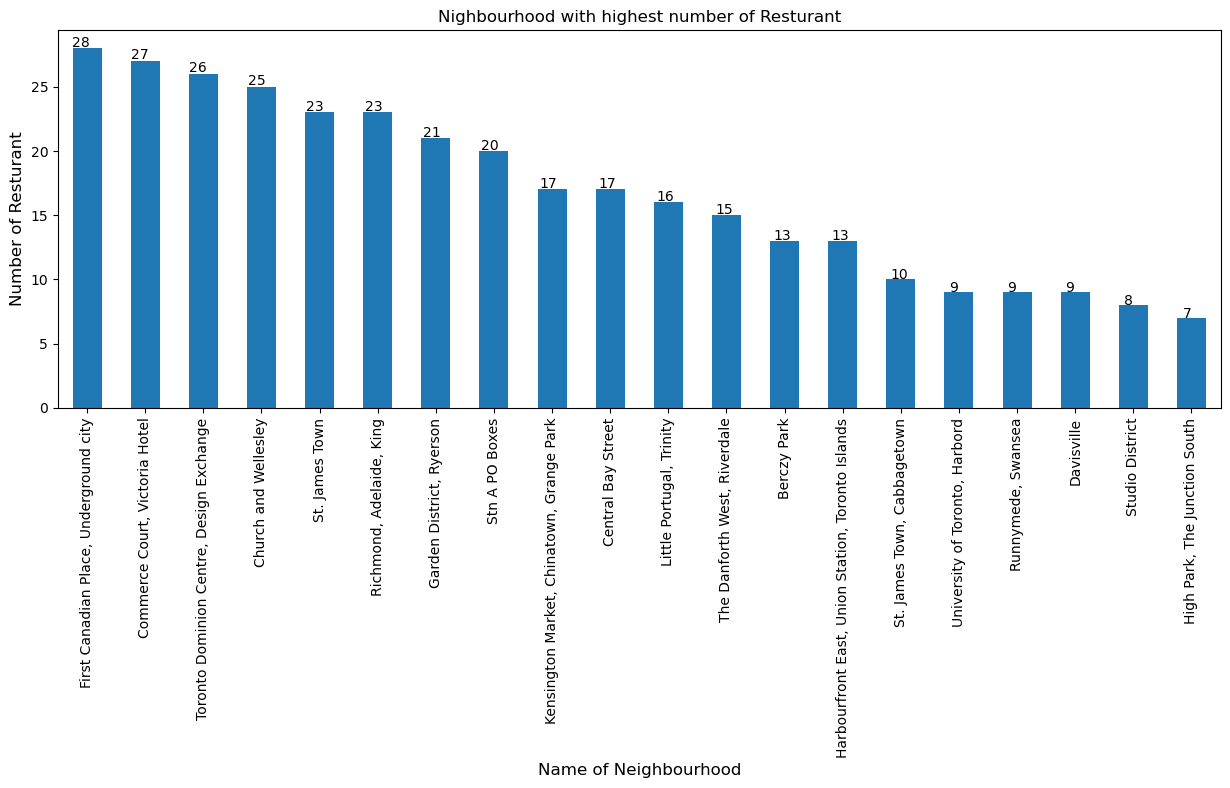

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi = 100)

plt.title('Nighbourhood with highest number of Resturant')
Plot_N = sorted__toronto_restaurant_N_10.groupby('Neighborhood')['Venue'].nlargest(10).plot(kind='bar')
plt.xlabel('Name of Neighbourhood',fontsize = 12)
plt.ylabel('Number of Resturant',fontsize = 12)
plt.xticks(fontsize=10, rotation=90)
for p in Plot_N.patches:
    Plot_N.annotate(str(p.get_height()),(p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 10)
plt.savefig('2.png', bbox_inches='tight')
plt.show()

### Popular type of Resturant

By plotting the dataframe we can visualize which type of restaurant has the highest number. It is clearly visible that Italian and Japanese restaurant are more famous in Toronto followed by Seafood and American.

In [45]:
toronto_restaurant_R = toronto_restaurant.groupby('Venue Category').count()
sorted__toronto_restaurant_R = toronto_restaurant_R.sort_values(by=['Venue'], axis=0, ascending=False, inplace=False)
print("Type of resturant in toronto :", toronto_restaurant_R.shape)
sorted__toronto_restaurant_R_20 = sorted__toronto_restaurant_R.iloc[0:20,:]
sorted__toronto_restaurant_R.head(7)

Type of resturant in toronto : (46, 6)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Restaurant,55,55,55,55,55,55
Italian Restaurant,37,37,37,37,37,37
Japanese Restaurant,32,32,32,32,32,32
Sushi Restaurant,24,24,24,24,24,24
Seafood Restaurant,21,21,21,21,21,21
American Restaurant,21,21,21,21,21,21
Vegetarian / Vegan Restaurant,16,16,16,16,16,16


> ### Plotting Bar Grapgh for Popular type of Resturant

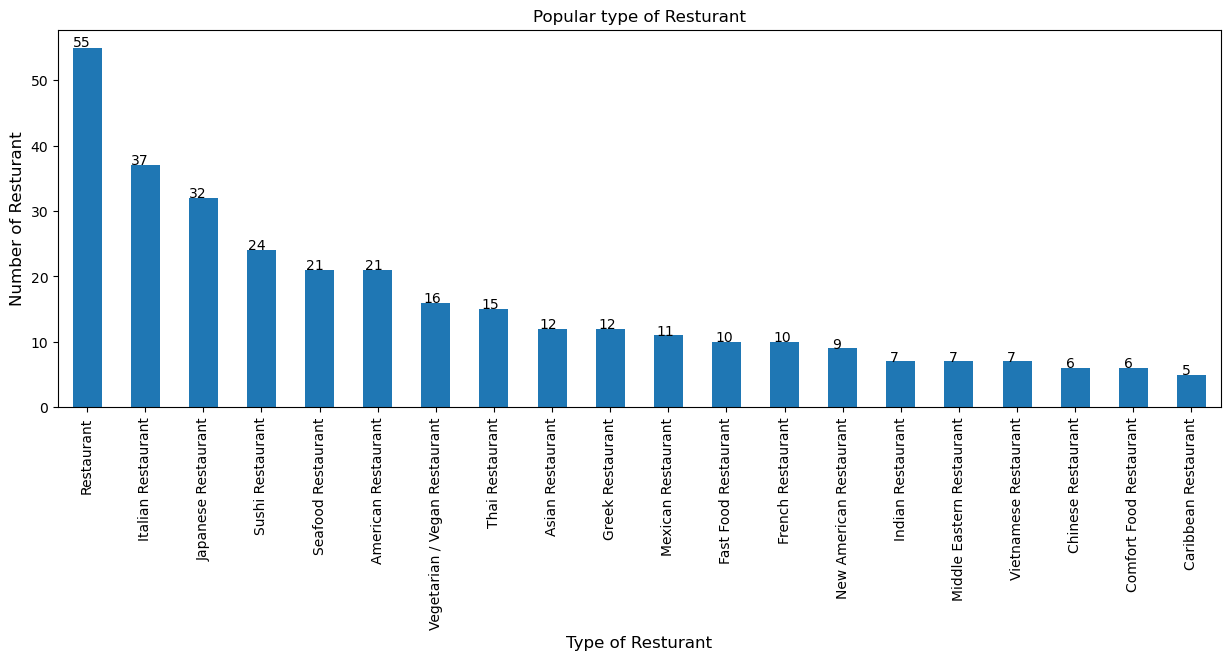

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi = 100)

plt.title('Popular type of Resturant')
Plot_R = sorted__toronto_restaurant_R_20.groupby('Venue Category')['Venue'].nlargest(10).plot(kind='bar')
plt.xlabel('Type of Resturant',fontsize = 12)
plt.ylabel('Number of Resturant',fontsize = 12)
plt.xticks(fontsize=10, rotation=90)
for p in Plot_R.patches:
    Plot_R.annotate(str(p.get_height()),(p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 10)
plt.savefig('3.png', bbox_inches='tight')
yu = plt.show()

### Neighbourhood with maximum number of Hotel

Location of restaurant is affected by many factor. If it located near to the hotel then probability of visitor is very high. Toronto Dominion Centre, Commerce court and First Canadian place have most number of hotel. 

In [47]:
toronto_hotel = toronto_venues[toronto_venues['Venue Category'].str.contains("Hotel")] 
toronto_hotel = toronto_hotel.groupby('Neighborhood').count()
sorted__toronto_hotel = toronto_hotel.sort_values(by=['Venue'], axis=0, ascending=False, inplace=False)
print("Number of Hotel :", toronto_hotel.shape)
sorted__toronto_hotel.head()

Number of Hotel : (12, 6)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Toronto Dominion Centre, Design Exchange",7,7,7,7,7,7
"Commerce Court, Victoria Hotel",6,6,6,6,6,6
"First Canadian Place, Underground city",5,5,5,5,5,5
"Harbourfront East, Union Station, Toronto Islands",5,5,5,5,5,5
"Richmond, Adelaide, King",4,4,4,4,4,4


### Plotting Bar Grapgh for Neighbourhood with maximum number of Hotel

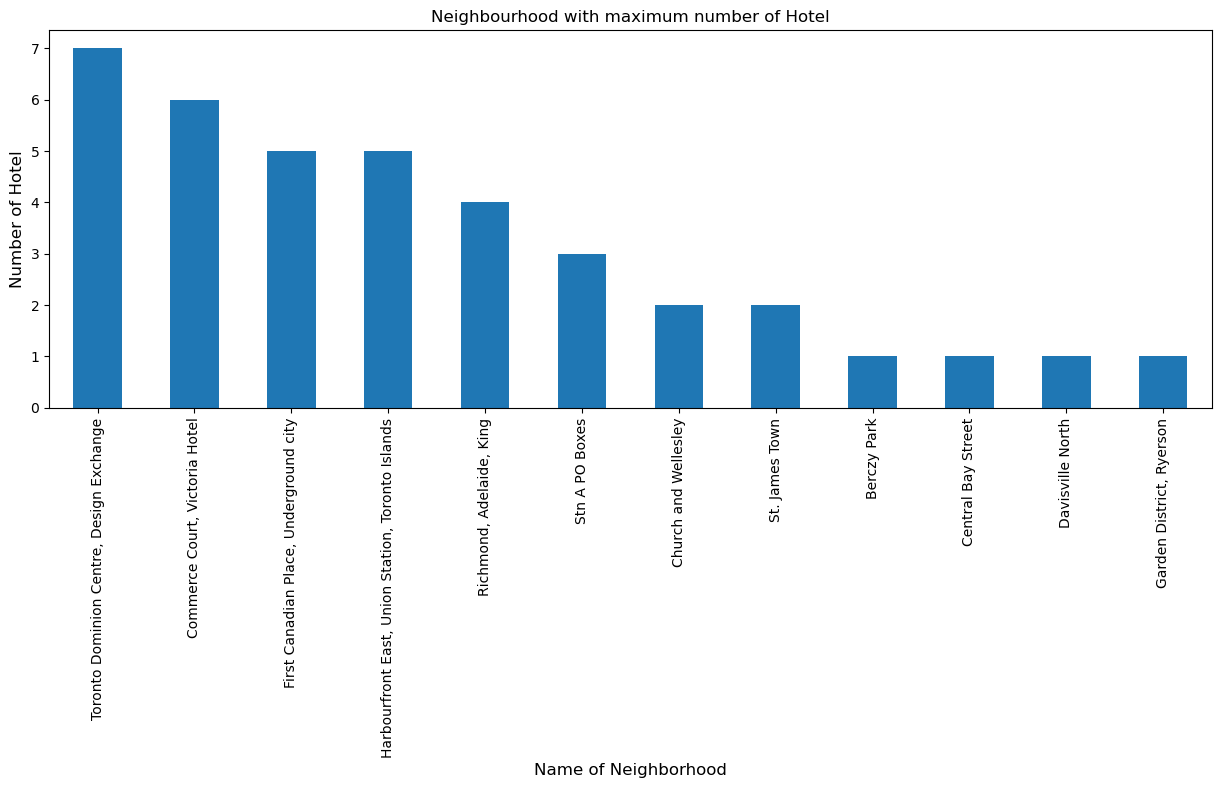

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi = 100)

plt.title('Neighbourhood with maximum number of Hotel')
Plot_H = sorted__toronto_hotel.groupby('Venue Category')['Venue'].nlargest(10).plot(kind='bar')
plt.xlabel('Name of Neighborhood',fontsize = 12)
plt.ylabel('Number of Hotel',fontsize = 12)
plt.xticks(fontsize=10, rotation=90)
for p in Plot_H.patches:
    Plot_R.annotate(str(p.get_height()),(p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 10)
plt.savefig('hotel.png', bbox_inches='tight')
yu = plt.show()

### Neighbourhood with maximum number of Office

In [49]:
toronto_office = toronto_venues[toronto_venues['Venue Category'].str.contains("Office")] 
toronto_office = toronto_office.groupby('Neighborhood').count()
sorted__toronto_office = toronto_office.sort_values(by=['Venue'], axis=0, ascending=False, inplace=False)
print("Number of Office :", toronto_office.shape)
sorted__toronto_office

Number of Office : (7, 6)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Richmond, Adelaide, King",2,2,2,2,2,2
Central Bay Street,1,1,1,1,1,1
"Commerce Court, Victoria Hotel",1,1,1,1,1,1
"Garden District, Ryerson",1,1,1,1,1,1
"Harbourfront East, Union Station, Toronto Islands",1,1,1,1,1,1
St. James Town,1,1,1,1,1,1
"Toronto Dominion Centre, Design Exchange",1,1,1,1,1,1


> ### Plotting Bar Grapgh for Neighbourhood with maximum number of Office

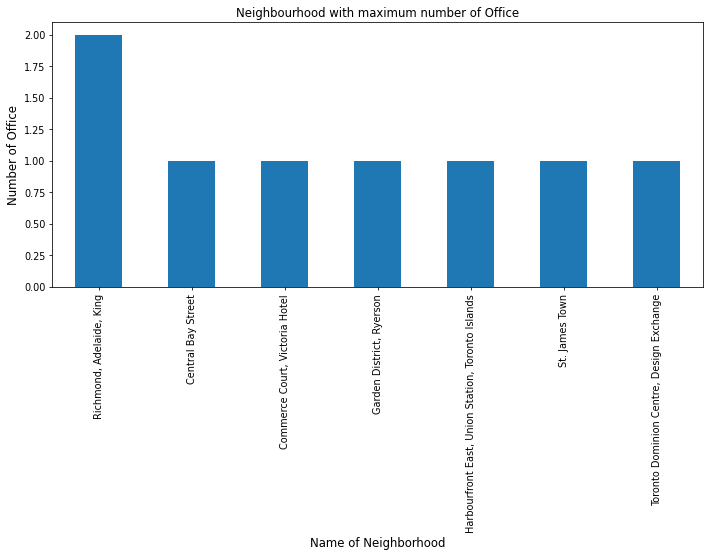

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5), dpi = 70)

plt.title('Neighbourhood with maximum number of Office')
Plot_O = sorted__toronto_office.groupby('Venue Category')['Venue'].nlargest(10).plot(kind='bar')
plt.xlabel('Name of Neighborhood',fontsize = 12)
plt.ylabel('Number of Office',fontsize = 12)
plt.xticks(fontsize=10, rotation=90)
for p in Plot_O.patches:
    Plot_R.annotate(str(p.get_height()),(p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 10)
plt.savefig('office.png', bbox_inches='tight')
yu = plt.show()

### Neighbourhood with maximum number of Concert Hall

In [51]:
toronto_concert_hall = toronto_venues[toronto_venues['Venue Category'].str.contains("Concert Hall")] 
toronto_concert_hall = toronto_concert_hall.groupby('Neighborhood').count()
sorted__toronto_concert_hall = toronto_concert_hall.sort_values(by=['Venue'], axis=0, ascending=False, inplace=False)
print("Number of Consert Hall :", toronto_concert_hall.shape)
toronto_concert_hall

Number of Consert Hall : (6, 6)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,1,1,1,1,1,1
"Commerce Court, Victoria Hotel",1,1,1,1,1,1
"First Canadian Place, Underground city",2,2,2,2,2,2
"Richmond, Adelaide, King",2,2,2,2,2,2
Stn A PO Boxes,1,1,1,1,1,1
"Toronto Dominion Centre, Design Exchange",2,2,2,2,2,2


### Ploting Bar Graph for Neighbourhood with maximum number of Concert Hall

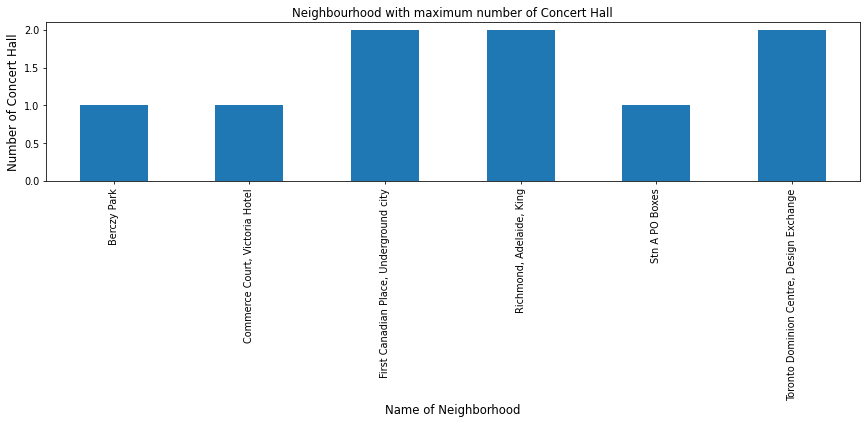

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3), dpi = 70)

plt.title('Neighbourhood with maximum number of Concert Hall')
Plot_C = toronto_concert_hall.groupby('Venue Category')['Venue'].nlargest(10).plot(kind='bar')
plt.xlabel('Name of Neighborhood',fontsize = 12)
plt.ylabel('Number of Concert Hall',fontsize = 12)
plt.xticks(fontsize=10, rotation=90)
for p in Plot_C.patches:
    Plot_R.annotate(str(p.get_height()),(p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 10)
plt.savefig('hall.png', bbox_inches='tight')
yu = plt.show()

## 3. Analyze Each Neighborhood

In [53]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
col_name = "Neighborhood"
first_col = toronto_onehot.pop(col_name)
toronto_onehot.insert(0, col_name, first_col)

A = ['Neighborhood','Restaurant','Italian Restaurant','Japanese Restaurant','Sushi Restaurant','Seafood Restaurant','American Restaurant','Thai Restaurant','Hotel','Office','Concert Hall']
P = toronto_onehot[A]
toronto_onehot = P
toronto_onehot.head()

,Neighborhood,Restaurant,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,American Restaurant,Thai Restaurant,Hotel,Office,Concert Hall
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",1,0,0,0,0,0,0,0,0,0


In [54]:
toronto_onehot.shape

(1640, 11)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [55]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

toronto_grouped = toronto_grouped.set_index('Neighborhood')
toronto_grouped['Total'] = toronto_grouped.sum(axis=1)
toronto_grouped.sort_values(by=('Total'), ascending=False,inplace=True)
toronto_grouped.drop("Total",axis = 1, inplace = True)
toronto_grouped.reset_index(inplace = True)
toronto_grouped.head()

,Neighborhood,Restaurant,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,American Restaurant,Thai Restaurant,Hotel,Office,Concert Hall
0,"Toronto Dominion Centre, Design Exchange",0.04,0.02,0.03,0.02,0.03,0.03,0.00,0.07,0.01,0.02
1,"Commerce Court, Victoria Hotel",0.07,0.02,0.02,0.00,0.03,0.04,0.01,0.06,0.01,0.01
2,"Forest Hill North & West, Forest Hill Road Park",0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00
3,"Moore Park, Summerhill East",0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,"First Canadian Place, Underground city",0.04,0.01,0.04,0.02,0.03,0.03,0.00,0.05,0.00,0.02


#### Let's confirm the new size

In [56]:
toronto_grouped.shape

(39, 11)

#### Let's print each neighborhood along with the top 5 most common venues

In [57]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Toronto Dominion Centre, Design Exchange----
                 venue  freq
0                Hotel  0.07
1           Restaurant  0.04
2  Japanese Restaurant  0.03
3   Seafood Restaurant  0.03
4  American Restaurant  0.03


----Commerce Court, Victoria Hotel----
                 venue  freq
0           Restaurant  0.07
1                Hotel  0.06
2  American Restaurant  0.04
3   Seafood Restaurant  0.03
4   Italian Restaurant  0.02


----Forest Hill North & West, Forest Hill Road Park----
                 venue  freq
0     Sushi Restaurant  0.25
1           Restaurant  0.00
2   Italian Restaurant  0.00
3  Japanese Restaurant  0.00
4   Seafood Restaurant  0.00


----Moore Park, Summerhill East----
                 venue  freq
0           Restaurant  0.25
1   Italian Restaurant  0.00
2  Japanese Restaurant  0.00
3     Sushi Restaurant  0.00
4   Seafood Restaurant  0.00


----First Canadian Place, Underground city----
                 venue  freq
0                Hotel  0.05
1          

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [58]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [59]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Toronto Dominion Centre, Design Exchange",Hotel,Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Concert Hall,Sushi Restaurant,Italian Restaurant,Office,Thai Restaurant
1,"Commerce Court, Victoria Hotel",Restaurant,Hotel,American Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,Concert Hall,Office,Thai Restaurant,Sushi Restaurant
2,"Forest Hill North & West, Forest Hill Road Park",Sushi Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,Restaurant
3,"Moore Park, Summerhill East",Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Italian Restaurant
4,"First Canadian Place, Underground city",Hotel,Japanese Restaurant,Restaurant,American Restaurant,Seafood Restaurant,Concert Hall,Sushi Restaurant,Italian Restaurant,Office,Thai Restaurant


## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [60]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 2, 3, 1, 1, 1, 4, 1, 1], dtype=int32)

In [61]:
col_name = "Neighborhood"
first_col = toronto_onehot.pop(col_name)
toronto_onehot.insert(0, col_name, first_col)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [62]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Italian Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Japanese Restaurant,Italian Restaurant,Office,Hotel,Thai Restaurant,Seafood Restaurant,Sushi Restaurant,Restaurant,Concert Hall,American Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Restaurant,American Restaurant,Hotel,Seafood Restaurant,Italian Restaurant,Office,Thai Restaurant,Japanese Restaurant,Concert Hall,Sushi Restaurant
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Restaurant


Finally, let's visualize the resulting clusters

In [63]:
latitude = float(latitude)
longitude = float(longitude)

In [64]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

AttributeError: 'list' object has no attribute 'rgb2hex'

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [65]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + [2] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,"Regent Park, Harbourfront",0,Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Italian Restaurant
1,Downtown Toronto,"Queen's Park, Ontario Provincial Government",0,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Restaurant
2,Downtown Toronto,"Garden District, Ryerson",0,Japanese Restaurant,Italian Restaurant,Office,Hotel,Thai Restaurant,Seafood Restaurant,Sushi Restaurant,Restaurant,Concert Hall,American Restaurant
4,East Toronto,The Beaches,0,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Restaurant
6,Downtown Toronto,Central Bay Street,0,Italian Restaurant,Japanese Restaurant,Office,Hotel,Thai Restaurant,Sushi Restaurant,Concert Hall,American Restaurant,Seafood Restaurant,Restaurant
9,West Toronto,"Dufferin, Dovercourt Village",0,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Restaurant
17,East Toronto,Studio District,0,American Restaurant,Thai Restaurant,Seafood Restaurant,Italian Restaurant,Concert Hall,Office,Hotel,Sushi Restaurant,Japanese Restaurant,Restaurant
18,Central Toronto,Lawrence Park,0,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Restaurant
19,Central Toronto,Roselawn,0,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Restaurant
22,West Toronto,"High Park, The Junction South",0,Thai Restaurant,Italian Restaurant,Concert Hall,Office,Hotel,American Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Restaurant


#### Cluster 2

In [66]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1]+ [2] + list(range(5, toronto_merged.shape[1]))]].head(8)

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Downtown Toronto,St. James Town,1,Restaurant,American Restaurant,Hotel,Seafood Restaurant,Italian Restaurant,Office,Thai Restaurant,Japanese Restaurant,Concert Hall,Sushi Restaurant
5,Downtown Toronto,Berczy Park,1,Seafood Restaurant,Restaurant,Concert Hall,Hotel,Thai Restaurant,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Office,American Restaurant
8,Downtown Toronto,"Richmond, Adelaide, King",1,Hotel,Restaurant,Thai Restaurant,Concert Hall,Office,American Restaurant,Sushi Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant
10,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",1,Hotel,Italian Restaurant,Restaurant,Office,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Concert Hall,Thai Restaurant,American Restaurant
13,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",1,Hotel,Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Concert Hall,Sushi Restaurant,Italian Restaurant,Office,Thai Restaurant
16,Downtown Toronto,"Commerce Court, Victoria Hotel",1,Restaurant,Hotel,American Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,Concert Hall,Office,Thai Restaurant,Sushi Restaurant
20,Central Toronto,Davisville North,1,Hotel,Concert Hall,Office,Thai Restaurant,American Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Restaurant
31,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",1,American Restaurant,Sushi Restaurant,Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant


#### Cluster 3

In [67]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1]+ [2] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",2,Sushi Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,Restaurant


#### Cluster 4

In [68]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + [2] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Central Toronto,"Moore Park, Summerhill East",3,Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant,Italian Restaurant


#### Cluster 5

In [69]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1]+ [2] + list(range(5, toronto_merged.shape[1]))]].head(8)

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Downtown Toronto,Christie,4,Italian Restaurant,Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant
11,West Toronto,"Little Portugal, Trinity",4,Restaurant,Japanese Restaurant,Italian Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Sushi Restaurant
12,East Toronto,"The Danforth West, Riverdale",4,Italian Restaurant,Restaurant,American Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant
14,West Toronto,"Brockton, Parkdale Village, Exhibition Place",4,Italian Restaurant,Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant
15,East Toronto,"India Bazaar, The Beaches West",4,Sushi Restaurant,Italian Restaurant,Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Japanese Restaurant
25,West Toronto,"Parkdale, Roncesvalles",4,Italian Restaurant,Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant,Sushi Restaurant,Japanese Restaurant
26,Central Toronto,Davisville,4,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Seafood Restaurant,Restaurant,Concert Hall,Office,Hotel,American Restaurant,Japanese Restaurant
27,Downtown Toronto,"University of Toronto, Harbord",4,Japanese Restaurant,Restaurant,Sushi Restaurant,Italian Restaurant,Concert Hall,Office,Hotel,Thai Restaurant,American Restaurant,Seafood Restaurant


# DISCUSSION

The aim of this project is to help individual or businessmen to find a location to build a restaurant in a city of Toronto. Preference of choice may vary person to person. If a person want to open Italian Restaurant, American Restaurant or Japanese Restaurant then Downtown Toronto is best place to open it. Also we find that Italian and Japanese restaurant are more famous in Toronto followed by Seafood and American. Toronto Dominion Centre, Commerce court and First Canadian place these are the places with most number of Hotel, Offices and Concert Hall along with the variety of restaurant. These places have more number of people than other area so Restaurant is more likely to succeed here. We can take many other factor in account for more accurate prediction. 

# CONCLUSION

This project helps a person get a better understanding of the neighbourhoods with respect to the most common venues in that neighbourhood. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places to establish there restaurant business. We have just taken venue in our project for finding the best location for restaurant. In future more factor like parking, population, traffic and many other factor can be taken into account. 

## ThankYou